# 1 Intro Stats Lecture Notes

---

## 1.0 Acknowledgements

This notebook is for the most part a summary of [Prof. Leonards lectures on Statistics](https://www.youtube.com/channel/UCoHhuummRZaIVX7bD4t2czg), accompanied by various other sources drawn from literature. For more information please refer to the *Works Cited* section at the bottom of this screen. The target audience will be other programmers which is reflected in the casual language used throughout these notes.

---

## 1.1 Introduction to Core Terminology

In this first section we will try to make sense of the keywords that are frequently used in statistics to get us started.

- Any collection of observations that have been collected about the members of a group is called **data**.
- **Population** refers to the complete collection of all elements in a group.
- **Samples** are some subsets (or sub-groups) of a population that are of particular interest.
- **Census** is collecting from every member of a population.

What's important to note is that if you want to collect a sample, it must be collected *randomly*. A *statistic* is a numerical description of some characteristic of a sample while a *parameter* is a characteristic of a population. To put it simply, **statistics** is the study of collecting, analyzing, summarizing, interpreting and drawing conclusions from data. This term can further be devided into two categories (1):

1. **Descriptive Statistics** is the collection, organization, and presentation of data.
2. **Inferential Statistics** is the art/science of making inferences (estimates, predictions) about population parameters from sample statistics.

The link between these types of statistics is **Probability**. Moreover, we can also distinguish between two types of data:

1. **Qualitative Data** (or Categorical Data) is data that is non-numerical, e.g. gender, race, ID numbers or zip codes. Mathematical operations cannot be performed on a collection of qualitative data.
2. **Quantitative Data**, on the contrary, is inherently numerical where mathematical operations do make sense and are well defined, like samples on height, weight or age.

On top of that there's an even more refined definition of *quantitative data*. Here we make a distinction between *discrete* and *continuous* data in terms of:

1. **Discrete Data**, or data that is countable or finite.
2. **Continuous Data**, or data that can assume an infinite number of possible values.

Continuous data can take on any value and is usually a measurement of time, length, volume or weight. In between any two measurements exists another, even though it often appears to be discrete because of the physical limitations of measuring devices (1).

In order to make statements about obtained data collections we can use the *Four Levels of Measurement*, given here from lowest to highest level:

1. **Nominal Measurements** can be categorized, but not ordered, leveled or averaged. Examples of nominal data is religious affiliation or gender identities, so generally qualitative data sets.
2. **Ordinal Measurements** can be ordered but the difference between measurements are meaningless, for example the results of an exam (A, B, C, D, E and F).
3. **Interval Measurements** are almost the same as ordinal measurements except that differences between measurements make sense in this case. This category does not have natural zeros, thus the notion of ratios makes not much sense here. Take for example non-Kelvin temperatures where zero degrees fahrenheit does not imply that there's no temperature outside.
4. **Ratio Measurements** has it all and is best suited for numerical comparisons; for instance monetary currencies from countries all over the world, weights, lengths, and so on.

<div align="center"><img src="img/levels.png" alt="Levels"></div>
<div align="center">Breakdown for different Types of Variables (2)<div>

---

## 1.2 Randomness

A crucial point in statistics is the design of an experiment or how any collection of observations is obtained. I would like to take this opportunity to point out a difference in terminology here:

- **Observations** measure specific traits, but do not modify the subjects of the study.
- **Experiments** apply some sort of treatment first and then measure the effects on the subjects.

As far as randomness is concerned, we can use the following definition for the time being:

> A selection is **random** when each member of a population has an equal chance of being selected.

In python we can use the pseudo-random class `random` to replicate this behavior by example of an dice roll:

In [2]:
import random

def roll_six_faced_dice():
    return random.choice([1, 2, 3, 4, 5, 6])

# What did you roll?
print(f"You rolled a {roll_six_faced_dice()}.")

You rolled a 4.


**Fun Fact:** In DnD and other tabletop games they often use [dice notation](https://en.wikipedia.org/wiki/Dice_notation) to represent die with potentially different outcomes. The `roll_six_faced_dice()` method above for example could also be denoted by `D6`, i.e. a dice with six faces, while a `D20`'s population is within the range of `1` and `21`.

In [3]:
def roll_dice(faces):
    dice = list(range(1, faces + 1))
    return random.choice(dice)

# Roll for dexterity!
print(f"You rolled a {roll_dice(20)}.")

You rolled a 8.


These games also frequently employ an algebra-like notation such as `3D20+2` to achieve more complex outcomes. The first parameter denotes the number of die to roll (`count`), while the second parameter represents the number of faces for each individual die. The `modifier` parameter acts as an bonus (and sometimes as an disadvantage) to increase or decrease the likelihood of rolling a higher value and is added to the result of the final outcome.

In [4]:
def d(count, faces, modifier = 0):
    dice = list(range(1, faces + 1))
    for _ in range(count):
        yield random.choice(dice) + modifier    

# Good luck!
c, f, m = 3, 20, 2
print(f"Rolling {c}D{f}+{m}: {list(d(c, f, m))}")

Rolling 3D20+2: [14, 20, 11]


Last code snippet for this subsection; a slightly modified version of this method might also be used to generate random boolean values. Other variations include `return random.choice([True, False])`, but the speed isn't necessarily the same depending on the implementation, although one might argue that a little gain in performance isn't really worth the trouble fighting over.

In [5]:
def coin_toss():
    return 'H' if random.getrandbits(1) == 1 else 'T'

# Heads or tails?
print(f"Coin toss result: {coin_toss()}")

Coin toss result: T


This class produces *pseudo-random* numbers, in other words it means that it is not cryptographically secure and shouldn't be used for encryption and decryption purposes, but for our use cases it is random enough to justify its usage in future examples. You can read more about it in the [documentation](https://docs.python.org/3.8/library/random.html).

---

## 1.3 Sampling Techniques

There are four common sampling techniques:

- The **Convenience Sample** uses the results that are the easiest to obtain. As a consequence, this sampling technique is *not* random.
- With **Systematic Sampling** one puts a population in some order after which every k-th member gets selected.
- A **Stratified Sample** breaks a population into sub-groups based on a certain characteristic, and then samples each sub-group.
- **Cluster Sampling** divides a population into clusters regardless of any characteristic, randomly selects a certain number of clusters and then collects data from the *entire* cluster.

While collecting the data for a statistic there are two types of errors that can occur: The first one is called a *non-sampling error* where you are at fault and made a mistake (e.g. you wrote something down that is not correct or miscalculated somewhere down the line). A *sampling error*, on the contrary, is the difference in characteristic between your sample and your population.

---

## 1.4 Frequency Distributions and Histograms

I recommend that you watch [this lecture](https://www.youtube.com/watch?v=AbHn39y8eUo&list=PL5102DFDC6790F3D0&index=4) from Prof. Leonard on YouTube first before you work your way through this subsection. That being said, the keywords this time are:

- **Frequency Distribution** is a list of values with corresponding frequencies.
- **Class Widths** are the difference between two lower class limits.
- **Lower Class Limits** are the smallest value belonging to a class.
- **Upper Class Limits** are the largest value belonging to a class.

Let $n$ be a sample subject to our study (e.g. the number of students in a math course). Then the *frequency* $f$ of each class is the count of entries. Generally speaking, the number of classes $\#$ should be somewhere in-between $5$ and $20$. For starters you can use this formula to get a reasonable approximation:

$$\# = \left\lceil\sqrt{n}\right\rceil$$

Based on the previous result the class width $w$ is then determined by

$$w=\left\lceil\frac{\max(n)-\min(n)}{\#}\right\rceil$$

Each class has a inclusive *lower class limit* and *upper class limit*. The smallest lower class limit is equal to the minimum value $\min(n)$. From there you can start constructing a frequency distribution table. Given a list of students we generate on-the-fly, we will see how we can use this new information to turn this data into a histogram.

**Example:**
The method `classroom(count, min_age, max_age)` below generates a collection of students; initially their age is bounded by `18` and `49` years with a student count of `43`. Hence, $\# = \left\lceil\sqrt{43}\right\rceil=7$ and $w=\left\lceil\frac{49-18}{7}\right\rceil=5$. Based on these values we can construct the following frequency distribution table:

| # | Class   | Frequency |
|---|---------|-----------|
| 1 | 18 - 22 |     ?     |
| 2 | 23 - 27 |     ?     |
| 3 | 28 - 32 |     ?     |
| 4 | 33 - 37 |     ?     |
| 5 | 38 - 42 |     ?     |
| 6 | 43 - 47 |     ?     |
| 7 | 48 - 52 |     ?     |

In this case, the lower class limits are `[18, 23, 28, ..., 48]`, while the upper class limits are given by `[22, 27, 32, ..., 52]`. Note that the cardinality of each class (also called *bins* in `matplotlib`) is equal to the class width $w$, in other words 

$$w=|\{18, 19, 20, 21, 22\}|=|\{23, 24, 25, 26, 27\}|=\cdots=|\{48, 49, 50, 51, 52\}|=5$$

Naturally the data changes each time the method compiles, which is why the table is incomplete. You will also need the *class boundaries* $b$ to plot the histogram. Fortunately they aren't hard to compute, either:

$$b = \left\{\frac{18+17}{2}, \frac{23+22}{2}, \frac{28+27}{2}, \cdots, \frac{53+52}{2}\right\} = \{17.5, 22.5, 27.5, \cdots, 52.5\}$$

Notice how averaging two neighboring integers is the same as subtracting `0.5` from the larger one; this is exactly what I did in the `class_boundaries()` method! Since all ages are randomly generated, the youngest student sometimes is a little older than 18. Conversely, the oldest student might turn out to be younger than `43` years old. Take this as an opportunity to re-compute the table above or hit refresh until the conditions in the original problem statement are met.

Students enrolled in Math101:

37 (Angie Merritt)
35 (Abigail Hartman)
47 (Tara Wilson)
49 (Crystal Cordova)
30 (Andrea Garcia)
20 (Lacey Allen)
35 (Lynn Tucker)
41 (Christine Holt)
28 (Jason Garrett)
29 (Angela Crawford)
20 (Maria Jackson)
45 (Michael Kelly)
46 (Kevin Stephenson)
23 (Megan Silva)
30 (Erica Warren)
47 (Julia Miller)
18 (Angelica Ware)
24 (Billy Thompson)
27 (Christopher Parker)
19 (Ryan Hughes)
34 (Virginia Young MD)
41 (Tiffany Kent)
48 (Miguel Murray)
32 (Mike Jones)
45 (Dustin Gonzalez)
26 (Shawn Santana)
28 (Veronica Thompson)
41 (Danny Yates)
40 (Brittany Flynn)
33 (Christopher Martinez)
39 (Jamie Bradley)
23 (Daniel Griffin)
18 (Theresa Cooper)
38 (Mike Lynch)
29 (Kimberly Price)
27 (Katherine Collins)
29 (Pamela Baldwin)
38 (Rhonda Gregory)
20 (Diane Brown)
27 (Jeffery Henson)
29 (Kathryn Pugh DVM)
38 (Darius Frazier)
33 (Danny Rivera)

Youngest Student: 18, Oldest Student: 49 (43 Students in Total)


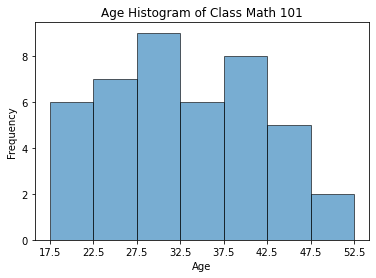

In [150]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from faker import Faker

def class_boundaries(values, class_count, class_width):
    """ Returns a list of class boundaries."""
    min_value = min(values)
    return [min_value + (i * class_width) - 0.5 for i in range(class_count + 1)]

def classroom(count, min_age, max_age):
    """ Returns a dictionary of students using their names as keys and age as value."""
    fake = Faker()
    students = {}
    
    for student in range(count):
        students[fake.name()] = random.randint(min_age, max_age)
        
    return students

# assemble students for next class
math101 = classroom(count=43, min_age=18, max_age=49)
print("Students enrolled in Math101:\n")
for name, age in math101.items():
    print(f"{age} ({name})")
    
# compute bins for histogram
ages = list(math101.values())
bins = class_boundaries(ages, class_count = 7, class_width = 5)

# plot age-frequency distribution
plt.hist(ages, bins=bins, alpha=0.6, edgecolor='black', linewidth=1)
plt.title("Age Histogram of Class Math 101")
plt.xticks(np.arange(min(bins), max(bins) + 1, 5))
plt.xlabel("Age")
plt.ylabel("Frequency")
print(f"\nYoungest Student: {min(ages)}, Oldest Student: {max(ages)} ({len(ages)} Students in Total)")

Another term that sometimes comes up in this context is *relative frequency distribution* which really is just a fancy word for converting the frequencies in the table above into percentages. Cumulative frequencies, on the other hand, add sequential class entries together. The table below demonstrates this over an example:

| # | Class   | Frequency | Rel. Frequency | Cum. Frequency |
|---|---------|-----------|----------------|----------------|
| 1 | 18 - 22 |     8     |      18.6%     |        8       |
| 2 | 23 - 27 |     9     |      21.0%     |       17       |
| 3 | 28 - 32 |     7     |      16.3%     |       24       |
| 4 | 33 - 37 |     5     |      11.6%     |       29       |
| 5 | 38 - 42 |     6     |      14.0%     |       35       |
| 6 | 43 - 47 |     5     |      11.6%     |       40       |
| 7 | 48 - 52 |     3     |       7.0%     |       43       |

**Things to think about:** 
1. Despite being randomly genarated, could the sample data produced by the methods above be considered realistic for the age distribution in a entry-level college class? Why or why not?
2. Speaking from experience, what trends did you expect to find in *your* class?
3. Would it make sense to plot the cumulative frequency distribution over the y-axis instead of the frequency? What implications would this chart have?

---

## Works Cited

(1) - *Introduction to Statistics - Think and Do* by Scott Stevens (`Version 4.1`)  
(2) - *OpenIntro Statistics* by David Diez, Cetinkaya-Rundel and Christopher D Barr (4th Edition)  